In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers, models

import os
import cv2

In [2]:
## read data
path = "../train/image/"
image_files = os.listdir(path)
x_train = [cv2.imread(os.path.join(path, file), cv2.IMREAD_COLOR) for file in image_files]

In [12]:
## images have different sizes, options: padding to max size, resize 
## we probably need the circle to stay circle, so padding is better
## padding to max size
# max_r = 0
# max_c = 0
# for image in x_train:
#     if image.shape[0] > max_r:
#         max_r = image.shape[0]
#     if image.shape[1] > max_c:
#         max_c = image.shape[1]
# print("max_r: ", max_r)
# print("max_c: ", max_c)

# x_train_padded = []
# for i in range(len(x_train)):
#     x_train_padded.append(cv2.copyMakeBorder(x_train[i], int(np.ceil((max_r-x_train[i].shape[0])/2)), int((max_r-x_train[i].shape[0])/2),int(np.ceil((max_c-x_train[i].shape[1])/2)), int((max_c-x_train[i].shape[1])/2), cv2.BORDER_CONSTANT, value=[0,0,0]))

# x_train_padded = np.array(x_train_padded)
# print("x_train_padded.shape: ", x_train_padded.shape)
## NOTE=> the sizes varied a lot, so padding is not the best option

## resize
# img_r = 224
# img_c = 224
# x_train = np.array([cv2.resize(image, (img_r,img_c)) for image in x_train])
## NOTE=> the circle is not circle anymore, so resize is not the best option

## customized resize
# remove all zero rows and columns
# x_train_cropped = []
# for image in x_train:
#     print(~np.all(image == 0, axis=(1,2)))
#     print(np.unique(image))
#     print(image.shape)
#     image = image[~np.all(image == 0, axis=(1,2))]
#     print(image.shape)
#     image = image[:, ~np.all(image == 0, axis=(0,2))]
#     print(image.shape)
#     x_train_cropped.append(image)
# #x_train_cropped = np.array(x_train_cropped)
# # resize to smallest size -> waste resolution?!
# min_r = 10000
# min_c = 10000
# for image in x_train_cropped:
#     if image.shape[0] < min_r:
#         min_r = image.shape[0]
#     if image.shape[1] < min_c:
#         min_c = image.shape[1]
# print("min_r: ", min_r)
# print("min_c: ", min_c)
# x_train_resized = np.array([cv2.resize(image, (min_r,min_c)) for image in x_train_cropped])
## NOTE=> not all backgrounds are zeros so the croping is not working :( :@ 

## custom resize 2
# crop to square first
x_train_cropped = []
for image in x_train:
    if image.shape[0] > image.shape[1]:
        image = image[int((image.shape[0]-image.shape[1])/2):int((image.shape[0]+image.shape[1])/2), :, :]
    else:
        image = image[:, int((image.shape[1]-image.shape[0])/2):int((image.shape[1]+image.shape[0])/2), :]
    x_train_cropped.append(image)
    print(image.shape)

# resize to smallest size -> waste resolution?!
min_r = 10000
min_c = 10000
for image in x_train_cropped:
    if image.shape[0] < min_r:
        min_r = image.shape[0]
    if image.shape[1] < min_c:
        min_c = image.shape[1]
print("min_r: ", min_r)
print("min_c: ", min_c)
x_train_resized = np.array([cv2.resize(image, (min_r,min_c)) for image in x_train_cropped])


(1728, 1728, 3)
(1728, 1728, 3)
(1934, 1934, 3)
(1934, 1934, 3)
(1934, 1934, 3)
(1934, 1934, 3)
(1934, 1934, 3)
(1536, 1536, 3)
(1536, 1536, 3)
(1536, 1536, 3)
(1536, 1536, 3)
(1536, 1536, 3)
(1536, 1536, 3)
(2448, 2448, 3)
(2448, 2448, 3)
(2448, 2448, 3)
(2448, 2448, 3)
(2000, 2000, 3)
(2000, 2000, 3)
(2000, 2000, 3)
(1728, 1728, 3)
(1728, 1728, 3)
(1728, 1728, 3)
(1728, 1728, 3)
(1728, 1728, 3)
(1728, 1728, 3)
(2935, 2935, 3)
(2935, 2935, 3)
(2935, 2935, 3)
(2935, 2935, 3)
(2935, 2935, 3)
(2935, 2935, 3)
(2935, 2935, 3)
(1728, 1728, 3)
(2935, 2935, 3)
(1728, 1728, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1824, 1824, 3)
(1536, 1536, 3)
(1536, 1536, 3)
(1536, 1536, 3)
(1536, 1536, 3)
(3000, 3000, 3)
(3000, 3000, 3)
(1728, 1728, 3)
(1728, 1728, 3)
(1728, 1728, 3)
(1728, 1728, 3)
(1728, 1728, 3)
(1728, 1728, 3)
(1728, 1

(1536, 2048, 3)


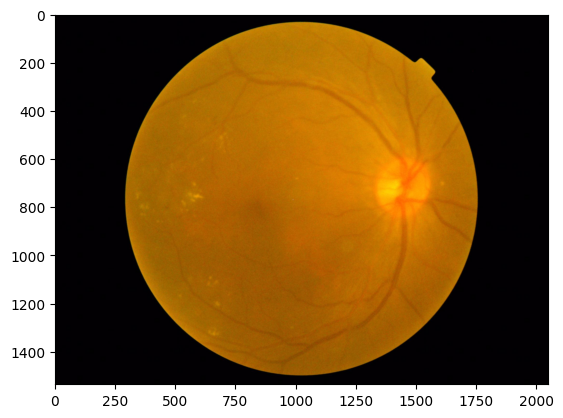

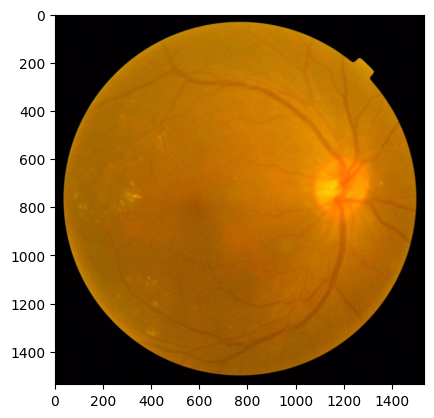

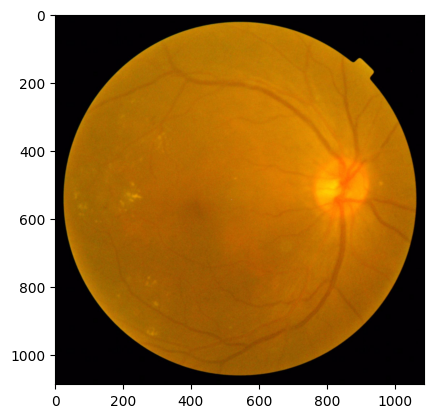

In [17]:
#x_train = np.array(x_train)
print(x_train[10].shape)
plt.imshow(cv2.cvtColor(x_train[130], cv2.COLOR_BGR2RGB))
#plt.imshow(x_train[70][:,:,2], cmap='gray')
plt.show()
plt.imshow(cv2.cvtColor(x_train_cropped[130], cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(x_train_resized[130], cv2.COLOR_BGR2RGB))